In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as cn
import cmath
import scienceplots

plt.style.use(['science','nature'])
#plt.style.use('science')
#plt.rcParams.update({'figure.dpi': '300'})

In [2]:
# define the ellipticity
def ellipticity(theta,w_c,w_p,w_i):
    u = (w_c/w_i)**2
    v = (w_p/w_i)**2
    b = (u**(1/2)*np.sin(theta)**2)/(2*np.cos(theta)*(1-v))
    alpha = -b**(-1)*(1 + (1 + b**(-2))**(1/2))**(-1)
    return alpha, b

In [3]:
# constants and variables in CGS units

m_e = cn.m_e*1000 # in grams
c = cn.c * 100 # in cm/s
e = cn.e*(1/3.336)*10**10 # in ESU
pi = cn.pi
evtoerg = 1.6021772e-12	 # ev to erg
a_f = 7.29735308e-3	# fine structure constant
h = 6.6261e-27 # planck's constant
hbar = 1.0546e-27 # reduced planck's constant

# define the variables
n_e = 5*10**21 # number density, cm^-3
B = 4.141*10**12 # the magnetic field, in Gauss
B_c = 4.141*10**13 # the critical magnetic field, in Gauss

w_p = np.sqrt((4*pi*e**2*n_e)/m_e) # the plasma frequency
w_c = (w_p**2/10**(-7))**(1/2)  # cyclotron frequency
w_i = np.geomspace(0.1*w_c, 10*w_c, 50) # range for incident frequency

In [4]:
u = (w_c/w_i)**2
v = (w_p/w_i)**2

In [5]:
def pol_vec1(angles):
    alpha, b = ellipticity(angles*np.pi/180,w_c,w_p,w_i)
    K1 = b*(1 - (1 + b**(-2))**(1/2))
    C1 = (1 + K1**2)**(-1/2)
    e_z1 = C1*K1*np.sin(angles*np.pi/180)
    e_p1 = 2**(-1/2)*C1*np.exp(-1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) + 1)
    e_m1 = 2**(-1/2)*C1*np.exp(1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) - 1)

    return e_p1, e_m1, e_z1

In [6]:
def pol_vec2(angles):
    alpha, b = ellipticity(angles*np.pi/180, w_c, w_p,w_i)
    K2 = b*(1 + (1 + b**(-2))**(1/2))
    C2 = (1 + K2**2)**(-1/2)
    e_z2 = C2*K2*np.sin(angles*np.pi/180)
    e_p2 = 2**(-1/2)*C2*np.exp(-1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) + 1)
    e_m2 = 2**(-1/2)*C2*np.exp(1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) - 1)

    return e_p2, e_m2, e_z2

In [7]:
# incident angle theta = 60
ei1p60, ei1m60, ei1z60 = pol_vec1(60)
ei2p60, ei2m60, ei2z60 = pol_vec2(60)

In [8]:
# outgoing angle theta = 20
ef1p20, ef1m20, ef1z20 = pol_vec1(20)
ef2p20, ef2m20, ef2z20 = pol_vec2(20)

In [9]:
# outgoing angle theta = 45
ef1p45, ef1m45, ef1z45 = pol_vec1(45)
ef2p45, ef2m45, ef2z45 = pol_vec2(45)

In [10]:
# differential cross-section polarization mode 1 to 1 (20)
dsigma1120 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p20)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef1m20)*ei1m60 + np.conj(ef1z20)*ei1z60)
dsigma1220 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p20)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef2m20)*ei1m60 + np.conj(ef2z20)*ei1z60)
# differential cross-section polarization mode 2 to 1
dsigma2120 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p20)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef1m20)*ei2m60 + np.conj(ef1z20)*ei2z60)
dsigma2220 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p20)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef2m20)*ei2m60 + np.conj(ef2z20)*ei2z60)

In [11]:
# differential cross-section polarization mode 1 to 1 (45)
dsigma1145 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p45)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef1m45)*ei1m60 + np.conj(ef1z45)*ei1z60)
dsigma1245 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p45)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef2m45)*ei1m60 + np.conj(ef2z45)*ei1z60)
# differential cross-section polmrization mode 2 to 1
dsigma2145 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p45)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef1m45)*ei2m60 + np.conj(ef1z45)*ei2z60)
dsigma2245 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p45)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef2m45)*ei2m60 + np.conj(ef2z45)*ei2z60)

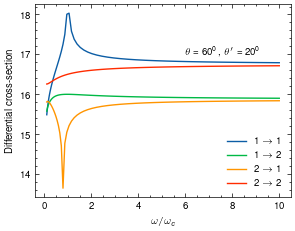

In [12]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1120), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1220), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2120), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2220), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 60^0, \, \theta' = 20^0$", (6,17))
#plt.ylim(16.42,16.48)
plt.legend()
plt.savefig('dc6020.eps',format='eps', dpi=1000)

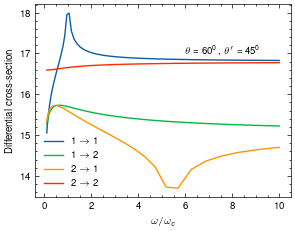

In [13]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1145), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1245), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2145), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2245), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 60^0, \, \theta' = 45^0$", (6,17))
plt.legend()
plt.savefig('dc6045.eps',format='eps', dpi=1000)

In [14]:
# differential cross-section polarization mode 1 to 1 (45)
dsigma116045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p60)*ef1p45 + (1/(1 - u**(1/2)))*np.conj(ei1m60)*ef1m45 + np.conj(ei1z60)*ef1z45)
dsigma126045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p60)*ef1p45 + (1/(1 - u**(1/2)))*np.conj(ei2m60)*ef1m45 + np.conj(ei2z60)*ef1z45)
# differential cross-section polarization mode 2 to 1
dsigma216045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p60)*ef2p45 + (1/(1 - u**(1/2)))*np.conj(ei1m60)*ef2m45 + np.conj(ei1z60)*ef2z45)
dsigma226045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p60)*ef2p45 + (1/(1 - u**(1/2)))*np.conj(ei2m60)*ef2m45 + np.conj(ei2z60)*ef2z45)

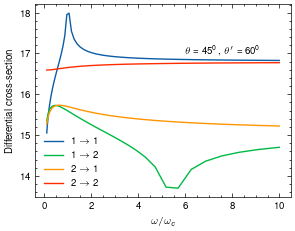

In [15]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma116045), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma126045), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma216045), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma226045), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 45^0, \, \theta' = 60^0$", (6,17))
plt.legend()
plt.savefig('dc4560.eps',format='eps', dpi=1000)

In [16]:
# outgoing angle theta = 120
ef1p120, ef1m120, ef1z120 = pol_vec1(120)
ef2p120, ef2m120, ef2z120 = pol_vec2(120)

In [17]:
# differential cross-section polarization mode 1 to 1 (120)
dsigma11120 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p120)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef1m120)*ei1m60 + np.conj(ef1z120)*ei1z60)
dsigma12120 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p120)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef2m120)*ei1m60 + np.conj(ef2z120)*ei1z60)
# differential cross-semtion polarization mode 2 to 1
dsigma21120 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p120)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef1m120)*ei2m60 + np.conj(ef1z120)*ei2z60)
dsigma22120 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p120)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef2m120)*ei2m60 + np.conj(ef2z120)*ei2z60)

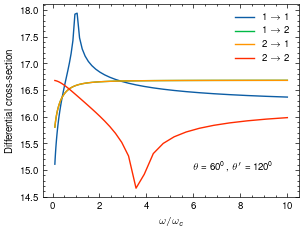

In [18]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma11120), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma12120), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma21120), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma22120), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 60^0, \, \theta' = 120^0$", (6,15))
plt.legend()
plt.savefig('dc60120.eps',format='eps', dpi=1000)

In [19]:
# outgoing angle theta = 120
ef1p160, ef1m160, ef1z160 = pol_vec1(160)
ef2p160, ef2m160, ef2z160 = pol_vec2(160)

In [20]:
# differential cross-section polarization mode 1 to 1 (160)
dsigma11160 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p160)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef1m160)*ei1m60 + np.conj(ef1z160)*ei1z60)
dsigma12160 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p160)*ei1p60 + (1/(1 - u**(1/2)))*np.conj(ef2m160)*ei1m60 + np.conj(ef2z160)*ei1z60)
# differential cross-section polarization mode 2 to 1
dsigma21160 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p160)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef1m160)*ei2m60 + np.conj(ef1z160)*ei2z60)
dsigma22160 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p160)*ei2p60 + (1/(1 - u**(1/2)))*np.conj(ef2m160)*ei2m60 + np.conj(ef2z160)*ei2z60)

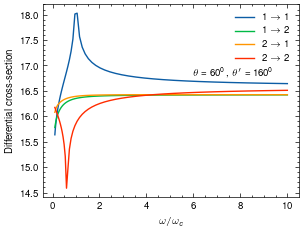

In [21]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma11160), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma12160), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma21160), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma22160), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 60^0, \, \theta' = 160^0$", (6,16.8))
plt.legend()
plt.savefig('dc60160.eps',format='eps', dpi=1000)

In [22]:
# incident angle theta = 65
ei1p30, ei1m30, ei1z30 = pol_vec1(30)
ei2p30, ei2m30, ei2z30 = pol_vec2(30)

In [23]:
# differential cross-section polarization mode 1 to 1 (20)
dsigma112030 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p20)*ei1p30 + (1/(1 - u**(1/2)))*np.conj(ef1m20)*ei1m30 + np.conj(ef1z20)*ei1z30)
dsigma122030 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p20)*ei1p30 + (1/(1 - u**(1/2)))*np.conj(ef2m20)*ei1m30 + np.conj(ef2z20)*ei1z30)
# differential cross-section polarization mode 2 to 1
dsigma212030 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p20)*ei2p30 + (1/(1 - u**(1/2)))*np.conj(ef1m20)*ei2m30 + np.conj(ef1z20)*ei2z30)
dsigma222030 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p20)*ei2p30 + (1/(1 - u**(1/2)))*np.conj(ef2m20)*ei2m30 + np.conj(ef2z20)*ei2z30)

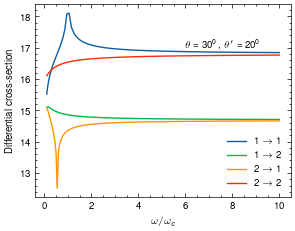

In [24]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma112030), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma122030), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma212030), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma222030), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 30^0, \, \theta' = 20^0$", (6,17))
plt.legend()
plt.savefig('dc3020.eps',format='eps', dpi=1000)

In [25]:
# differential cross-section polarization mode 1 to 1 (30)
dsigma1133 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p30)*ei1p30 + (1/(1 - u**(1/2)))*np.conj(ei1m30)*ei1m30 + np.conj(ei1z30)*ei1z30)
dsigma1233 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p30)*ei1p30 + (1/(1 - u**(1/2)))*np.conj(ei2m30)*ei1m30 + np.conj(ei2z30)*ei1z30)
# differential cross-section polarization mode 2 to 1
dsigma2133 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p30)*ei2p30 + (1/(1 - u**(1/2)))*np.conj(ei1m30)*ei2m30 + np.conj(ei1z30)*ei2z30)
dsigma2233 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p30)*ei2p30 + (1/(1 - u**(1/2)))*np.conj(ei2m30)*ei2m30 + np.conj(ei2z30)*ei2z30)

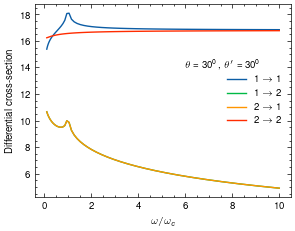

In [26]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1133), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1233), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2133), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2233), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 30^0, \, \theta' = 30^0$", (6,14))
plt.legend()
plt.savefig('dc3030.eps',format='eps', dpi=1000)

In [27]:
# incident angle theta = 65
ei1p120, ei1m120, ei1z120 = pol_vec1(120)
ei2p120, ei2m120, ei2z120 = pol_vec2(120)

In [28]:
# differential cross-section polarization mode 1 to 1 (20)
dsigma1112045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p20)*ei1p120 + (1/(1 - u**(1/2)))*np.conj(ef1m20)*ei1m120 + np.conj(ef1z20)*ei1z120)
dsigma1212045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p20)*ei1p120 + (1/(1 - u**(1/2)))*np.conj(ef2m20)*ei1m120 + np.conj(ef2z20)*ei1z120)
# differential cross-section polarization mode 2 to 1
dsigma2112045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p20)*ei2p120 + (1/(1 - u**(1/2)))*np.conj(ef1m20)*ei2m120 + np.conj(ef1z20)*ei2z120)
dsigma2212045 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p20)*ei2p120 + (1/(1 - u**(1/2)))*np.conj(ef2m20)*ei2m120 + np.conj(ef2z20)*ei2z120)

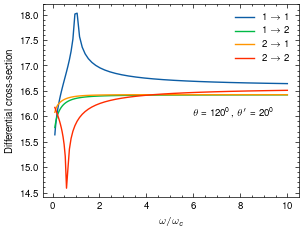

In [29]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1112045), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma1212045), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2112045), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma2212045), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 120^0, \, \theta' = 20^0$", (6,16))
plt.legend()
plt.savefig('dc12020.eps',format='eps', dpi=1000)

In [30]:
# incident angle theta = 65
ei1p90, ei1m90, ei1z90 = pol_vec1(90)
ei2p90, ei2m90, ei2z90 = pol_vec2(90)

In [31]:
# differential cross-section polarization mode 1 to 1 (20)
dsigma119090 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p90)*ei1p90 + (1/(1 - u**(1/2)))*np.conj(ei1m90)*ei1m90 + np.conj(ei1z90)*ei1z90)
dsigma129090 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p90)*ei1p90 + (1/(1 - u**(1/2)))*np.conj(ei2m90)*ei1m90 + np.conj(ei2z90)*ei1z90)
# differential cross-section polarization mode 2 to 1
dsigma219090 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p90)*ei2p90 + (1/(1 - u**(1/2)))*np.conj(ei1m90)*ei2m90 + np.conj(ei1z90)*ei2z90)
dsigma229090 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p90)*ei2p90 + (1/(1 - u**(1/2)))*np.conj(ei2m90)*ei2m90 + np.conj(ei2z90)*ei2z90)

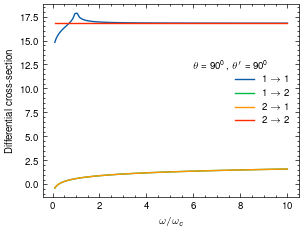

In [32]:
plt.plot(w_i/w_c, np.emath.logn(10,dsigma119090), label=r'$1 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma129090), label=r'$1 \to 2$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma219090), label=r'$2 \to 1$')
plt.plot(w_i/w_c, np.emath.logn(10,dsigma229090), label=r'$2 \to 2$')
plt.xlabel(r'$\omega/\omega_c$')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta = 90^0, \, \theta' = 90^0$", (6,12))
plt.legend()
plt.savefig('dc9090.eps',format='eps', dpi=1000)

In [33]:
np.polynomial.legendre.leggauss(2)

(array([-0.57735027,  0.57735027]), array([1., 1.]))

In [34]:
w_i = 0.5*w_c
u = (w_c/w_i)**2
v = (w_p/w_i)**2

In [35]:
angles = np.linspace(0.1,90,100)

In [36]:
ei1p, ei1m, ei1z = pol_vec1(angles)
ei2p, ei2m, ei2z = pol_vec2(angles)

In [37]:
# outgoing angle theta = 45
ef1p45, ef1m45, ef1z45 = pol_vec1(45)
ef2p45, ef2m45, ef2z45 = pol_vec2(45)

In [38]:
# differential cross-section polarization mode 1 to 1 (45)
dsigma11a45 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p45)*ei1p + (1/(1 - u**(1/2)))*np.conj(ef1m45)*ei1m + np.conj(ef1z45)*ei1z)
dsigma12a45 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p45)*ei1p + (1/(1 - u**(1/2)))*np.conj(ef2m45)*ei1m + np.conj(ef2z45)*ei1z)
# differential cross-section polarization mode 2 to 1
dsigma21a45 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef1p45)*ei2p + (1/(1 - u**(1/2)))*np.conj(ef1m45)*ei2m + np.conj(ef1z45)*ei2z)
dsigma22a45 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ef2p45)*ei2p + (1/(1 - u**(1/2)))*np.conj(ef2m45)*ei2m + np.conj(ef2z45)*ei2z)

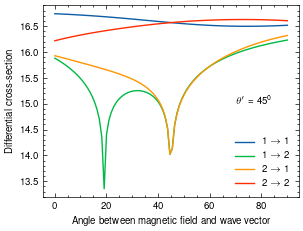

In [39]:
plt.plot(angles, np.emath.logn(10,dsigma11a45), label=r'$1 \to 1$')
plt.plot(angles, np.emath.logn(10,dsigma12a45), label=r'$1 \to 2$')
plt.plot(angles, np.emath.logn(10,dsigma21a45), label=r'$2 \to 1$')
plt.plot(angles, np.emath.logn(10,dsigma22a45), label=r'$2 \to 2$')
plt.xlabel(r'Angle between magnetic field and wave vector')
plt.ylabel(r'Differential cross-section')
plt.annotate(r"$\theta' = 45^0$", (70,15))
plt.legend()
plt.savefig('dctheta.eps',format='eps', dpi=1000)

In [40]:
e*B/(m_e*c)

7.28248977822344e+19